# Visualizing and Forecasting of Stocks (NSE)

- `Pandas` – This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.
- `Numpy` – Numpy arrays are very fast and can perform large computations in a very short time.
- `Matplotlib/Seaborn` – This library is used to draw visualizations.
- `Sklearn` – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation.
- `XGBoost` – This contains the eXtreme Gradient Boosting machine learning algorithm which is one of the algorithms which helps us to achieve high accuracy on predictions.

In [1]:
#importing the libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from pandas.plotting import lag_plot
import glob
import os
sns.set()
import warnings
warnings.filterwarnings('ignore')

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
import seaborn as sb
#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics


## Importing Dataset

- The dataset we will use here to perform the analysis and build a predictive model is Adani Enterprise Stock Price data.
- We will use OHLC(‘Open’, ‘High’, ‘Low’, ‘Close’) data from 1st January 2019 to 3rd Nov 2022

In [2]:
#loading the data
adanient = pd.read_csv('NSE_ADANIENT.csv',parse_dates=['Date'], dayfirst=True)
#adanient['Date'] = pd.to_datetime(adanient['Date'])
adanient.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,160.899994,162.350006,155.449997,157.250000,155.465088,4726656
1,2019-01-02,157.000000,157.850006,152.500000,154.850006,153.092361,2735262
2,2019-01-03,154.899994,156.100006,150.300003,152.500000,150.769012,2758876
3,2019-01-04,152.100006,154.000000,150.000000,152.550003,150.818451,2777308
4,2019-01-07,152.899994,154.449997,150.250000,151.250000,149.533203,2714218


- From the first five rows, we can see that data for some of the dates is missing the reason for that is on weekends and holidays Stock Market remains closed hence no trading happens on these days.

In [3]:
adanient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       950 non-null    datetime64[ns]
 1   Open       950 non-null    float64       
 2   High       950 non-null    float64       
 3   Low        950 non-null    float64       
 4   Close      950 non-null    float64       
 5   Adj Close  950 non-null    float64       
 6   Volume     950 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 52.1 KB


In [4]:
print("\n")
print("Open   --- mean :", np.mean(adanient['Open']),  "  \t Std: ", np.std(adanient['Open']),  "  \t Max: ", np.max(adanient['Open']),  "  \t Min: ", np.min(adanient['Open']))
print("High   --- mean :", np.mean(adanient['High']),  "  \t Std: ", np.std(adanient['High']),  "  \t Max: ", np.max(adanient['High']),  "  \t Min: ", np.min(adanient['High']))
print("Low    --- mean :", np.mean(adanient['Low']),   "  \t Std: ", np.std(adanient['Low']),   "  \t Max: ", np.max(adanient['Low']),   "  \t Min: ", np.min(adanient['Low']))
print("Close  --- mean :", np.mean(adanient['Close']), "  \t Std: ", np.std(adanient['Close']), "  \t Max: ", np.max(adanient['Close']), "  \t Min: ", np.min(adanient['Close']))
print("Volume --- mean :", np.mean(adanient['Volume']),"  \t Std: ", np.std(adanient['Volume']),"  \t Max: ", np.max(adanient['Volume']),"  \t Min: ", np.min(adanient['Volume']))



Open   --- mean : 967.6365255178948   	 Std:  959.4566600451187   	 Max:  3837.649902   	 Min:  116.349998
High   --- mean : 986.2366821631572   	 Std:  975.2937875729492   	 Max:  3885.0   	 Min:  119.5
Low    --- mean : 949.9067905957897   	 Std:  943.5604917335505   	 Max:  3812.0   	 Min:  113.0
Close  --- mean : 969.0835262031584   	 Std:  960.392715442575   	 Max:  3834.550049   	 Min:  116.949997
Volume --- mean : 4898751.874736842   	 Std:  5184593.824054264   	 Max:  61334483   	 Min:  248249


In [5]:
adanient.shape

(950, 7)

- From this, we got to know that there are 950 rows of data available and for each row, we have 7 different features or columns.

In [6]:
adanient['Date'] = pd.to_datetime(adanient['Date'])

In [7]:
print(f'Dataframe contains stock prices between {adanient.Date.min()} {adanient.Date.max()}') 
print(f'Total days = {(adanient.Date.max()  - adanient.Date.min()).days} days')

Dataframe contains stock prices between 2019-01-01 00:00:00 2022-11-03 00:00:00
Total days = 1402 days


In [8]:
adanient.describe()

,Open,High,Low,Close,Adj Close,Volume
count,950.000000,950.000000,950.000000,950.000000,950.000000,9.500000e+02
mean,967.636526,986.236682,949.906791,969.083526,968.184123,4.898752e+06
std,959.962036,975.807506,944.057495,960.898585,961.141005,5.187325e+06
min,116.349998,119.500000,113.000000,116.949997,115.622528,2.482490e+05
25%,154.000000,157.037506,150.250000,153.162495,152.074284,2.156603e+06
50%,437.100006,454.399994,418.725006,446.600006,446.114136,3.549359e+06
75%,1632.562500,1669.462463,1608.412537,1644.287476,1643.588806,5.559366e+06
max,3837.649902,3885.000000,3812.000000,3834.550049,3834.550049,6.133448e+07


In [9]:
adanient.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
adanient =adanient.dropna()

In [11]:
adanient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       950 non-null    datetime64[ns]
 1   Open       950 non-null    float64       
 2   High       950 non-null    float64       
 3   Low        950 non-null    float64       
 4   Close      950 non-null    float64       
 5   Adj Close  950 non-null    float64       
 6   Volume     950 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 52.1 KB


In [12]:
adanient.shape

(950, 7)

- checking the the null values if any are present in the data frame.

In [13]:
adanient.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

- This implies that there are no null values in the data set provided.

## Exploratory Data Analysis

- EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. 

- While performing the EDA of the Adani Enterprise Stock Price data we will analyze how prices of the stock have moved over the period of time and how the end of the quarters affects the prices of the stock.

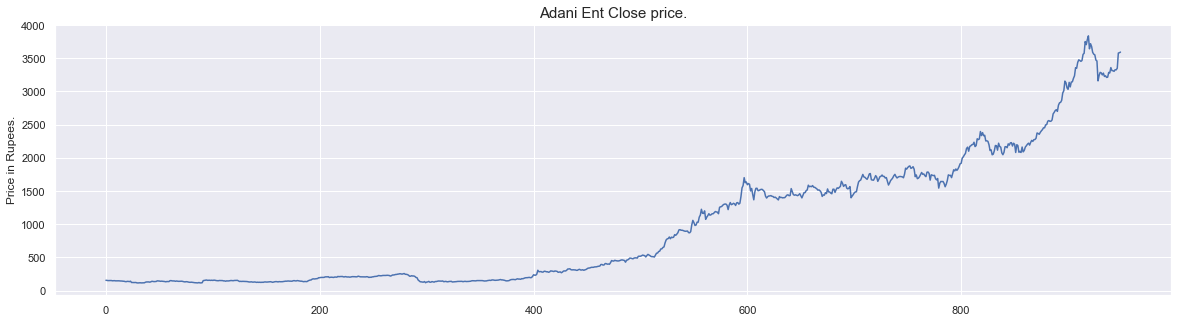

In [14]:
plt.figure(figsize=(20,5))
plt.plot(adanient['Close'])
plt.title('Adani Ent Close price.', fontsize=15)
plt.ylabel('Price in Rupees.')
plt.show()

The prices of the `Adani Ent` stocks are showing an upward trend as depicted by the plot of the closing price of the stocks

<AxesSubplot:>

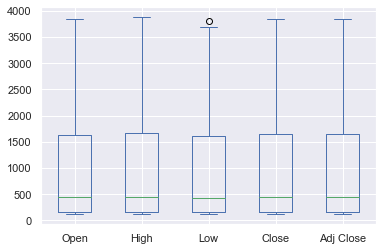

In [15]:
adanient[['Open','High','Low','Close','Adj Close']].plot(kind='box')

<AxesSubplot:>

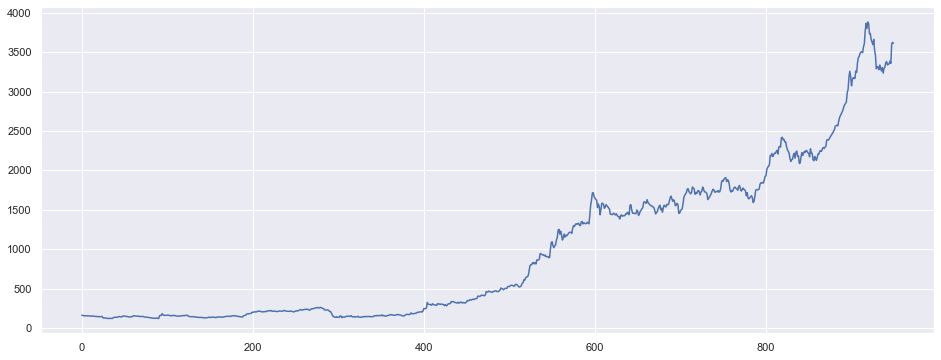

In [16]:
adanient['High'].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

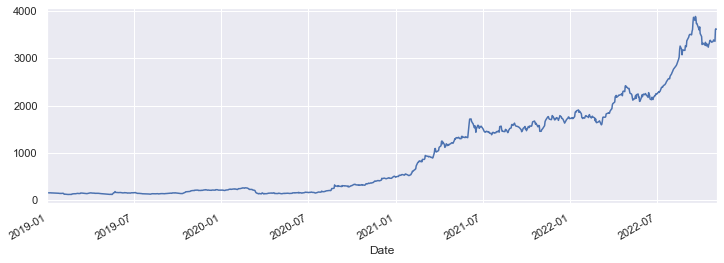

In [17]:
adanient=adanient.set_index('Date',drop=True) # yarra added we can remove later for testing purpose
## xlimit and y limit
adanient['High'].plot(xlim=['2019-01-01','2022-11-04'],figsize=(12,4))


In [18]:
adanient.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2022-10-20', '2022-10-21', '2022-10-24', '2022-10-25',
               '2022-10-27', '2022-10-28', '2022-10-31', '2022-11-01',
               '2022-11-02', '2022-11-03'],
              dtype='datetime64[ns]', name='Date', length=950, freq=None)

In [19]:
index=adanient.loc['2019-01-01':'2022-11-01'].index
share_open=adanient.loc['2019-01-01':'2022-11-01']['Open']

In [20]:
share_open

Date
2019-01-01     160.899994
2019-01-02     157.000000
2019-01-03     154.899994
2019-01-04     152.100006
2019-01-07     152.899994
                 ...     
2022-10-25    3321.949951
2022-10-27    3319.850098
2022-10-28    3322.000000
2022-10-31    3339.949951
2022-11-01    3361.899902
Name: Open, Length: 948, dtype: float64

In [21]:
index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21',
               '2022-10-24', '2022-10-25', '2022-10-27', '2022-10-28',
               '2022-10-31', '2022-11-01'],
              dtype='datetime64[ns]', name='Date', length=948, freq=None)

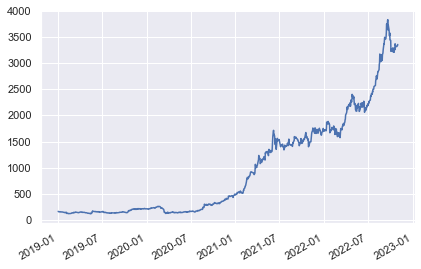

In [22]:
figure,axis=plt.subplots()
plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)

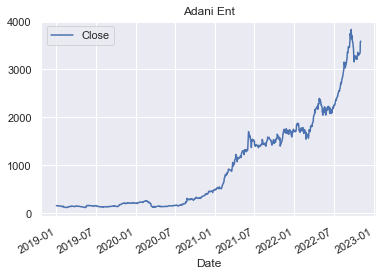

In [23]:
adanient[['Close']].plot()
plt.title("Adani Ent")
plt.show()

Text(0.5, 1.0, 'Adani Ent Cumulative Returns')

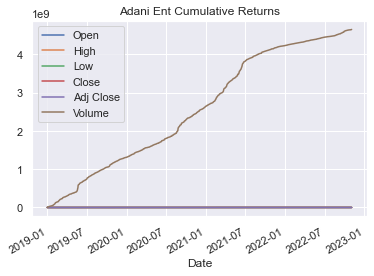

In [24]:
# Comulative Return
dr = adanient.cumsum()
dr.plot()
plt.title('Adani Ent Cumulative Returns')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


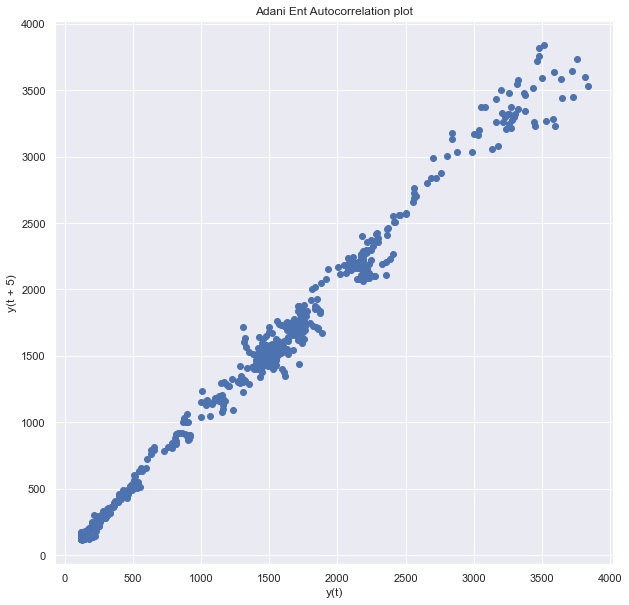

In [25]:
plt.figure(figsize=(10,10))
lag_plot(adanient['Open'], lag=5)
plt.title('Adani Ent Autocorrelation plot')
plt.show()

In [26]:
adanient=adanient.reset_index()

In [27]:
adanient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       950 non-null    datetime64[ns]
 1   Open       950 non-null    float64       
 2   High       950 non-null    float64       
 3   Low        950 non-null    float64       
 4   Close      950 non-null    float64       
 5   Adj Close  950 non-null    float64       
 6   Volume     950 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 52.1 KB


In [28]:
adanient=adanient.set_index('Date',drop=True)

In [29]:
adanient.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,160.899994,162.350006,155.449997,157.250000,155.465088,4726656
2019-01-02,157.000000,157.850006,152.500000,154.850006,153.092361,2735262
2019-01-03,154.899994,156.100006,150.300003,152.500000,150.769012,2758876
2019-01-04,152.100006,154.000000,150.000000,152.550003,150.818451,2777308
2019-01-07,152.899994,154.449997,150.250000,151.250000,149.533203,2714218


In [30]:
## datetime
from datetime import datetime

## Time Resampling

In [31]:
adanient.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,116.349998,119.500000,113.000000,116.949997,115.622528,1003411
2020-12-31,121.000000,129.800003,116.400002,120.900002,120.768463,620753
2021-12-31,477.000000,493.250000,477.000000,490.899994,490.365906,272261
2022-12-31,1574.900024,1592.000000,1528.800049,1543.949951,1543.293945,248249


In [32]:
adanient.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,217.750000,221.500000,212.399994,218.800003,216.974716,61334483
2020-12-31,492.000000,507.000000,484.700012,490.850006,490.315948,49264537
2021-12-31,1762.949951,1788.900024,1735.550049,1763.050049,1762.300903,43530006
2022-12-31,3837.649902,3885.000000,3812.000000,3834.550049,3834.550049,15060223


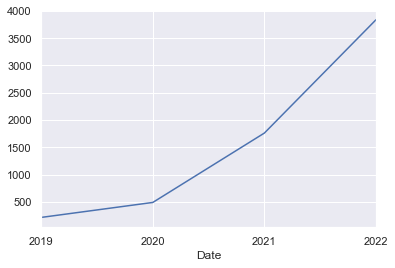

In [33]:
##year end frequency
adanient.resample(rule='A').max()['Open'].plot()
plt.show()

- We are downsample the data using the alias “A” for year-end frequency for `Open` column and plot results in plot

<AxesSubplot:xlabel='Date'>

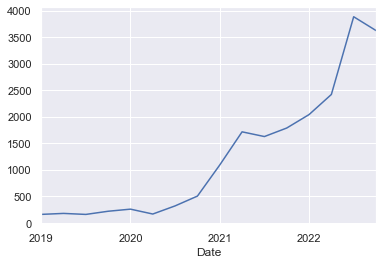

In [34]:
##quaterly start frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
adanient.resample(rule='QS').max()['High'].plot()

- We are downsample the data using the alias “A” for  Quaterly starting data frequency for High column and plot results in plot

In [35]:
##Business End Frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
adanient.resample(rule='BA').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,217.750000,221.500000,212.399994,218.800003,216.974716,61334483
2020-12-31,492.000000,507.000000,484.700012,490.850006,490.315948,49264537
2021-12-31,1762.949951,1788.900024,1735.550049,1763.050049,1762.300903,43530006
2022-12-30,3837.649902,3885.000000,3812.000000,3834.550049,3834.550049,15060223


In [36]:
adanient.resample(rule='BQS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,160.899994,162.350006,155.449997,157.250000,155.465088,14695085
2019-04-01,169.500000,180.800003,157.699997,161.050003,159.221970,61334483
2019-07-01,160.100006,161.800003,154.300003,156.100006,154.328156,15687573
2019-10-01,217.750000,221.500000,212.399994,218.800003,216.974716,14162661
2020-01-01,256.899994,261.000000,252.649994,258.649994,256.492279,10810744
2020-04-01,164.000000,169.199997,161.300003,162.149994,161.973587,16533100
2020-07-01,301.799988,322.399994,295.100006,307.549988,307.215393,49264537
2020-10-01,492.000000,507.000000,484.700012,490.850006,490.315948,20009492
2021-01-01,1063.000000,1093.000000,1018.400024,1058.400024,1057.248535,31098225


<AxesSubplot:xlabel='Date'>

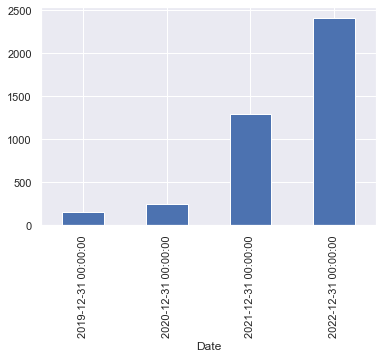

In [37]:
##plotting
adanient['Open'].resample(rule='A').mean().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

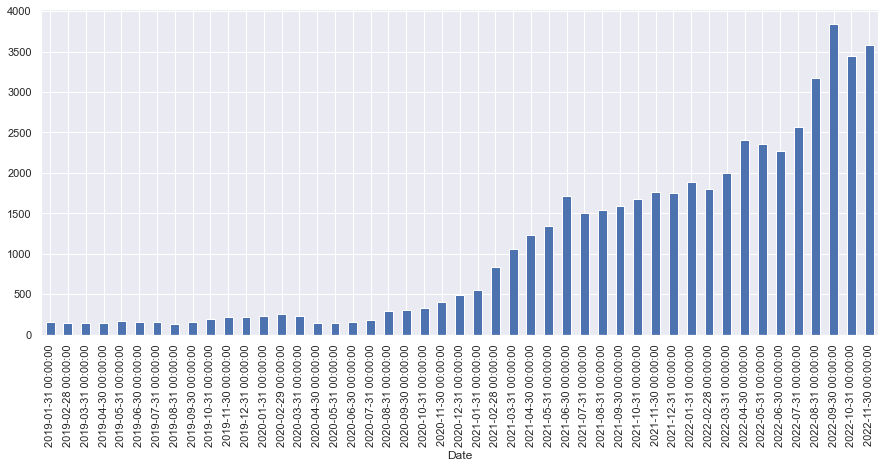

In [38]:
adanient['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))

In [39]:
adanient['High'].rolling(11).max().head(20)

Date
2019-01-01           NaN
2019-01-02           NaN
2019-01-03           NaN
2019-01-04           NaN
2019-01-07           NaN
2019-01-08           NaN
2019-01-09           NaN
2019-01-10           NaN
2019-01-11           NaN
2019-01-14           NaN
2019-01-15    162.350006
2019-01-16    157.850006
2019-01-17    156.100006
2019-01-18    154.449997
2019-01-21    154.449997
2019-01-22    154.449997
2019-01-23    154.449997
2019-01-24    152.600006
2019-01-25    152.600006
2019-01-28    151.250000
Name: High, dtype: float64

In [40]:
adanient.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,160.899994,162.350006,155.449997,157.250000,155.465088,4726656
2019-01-02,157.000000,157.850006,152.500000,154.850006,153.092361,2735262
2019-01-03,154.899994,156.100006,150.300003,152.500000,150.769012,2758876
2019-01-04,152.100006,154.000000,150.000000,152.550003,150.818451,2777308
2019-01-07,152.899994,154.449997,150.250000,151.250000,149.533203,2714218


In [41]:
adanient['Open:30 days rolling']=adanient['Open'].rolling(30).mean()

In [42]:
adanient.head(31)

,Open,High,Low,Close,Adj Close,Volume,Open:30 days rolling
Date,,,,,,,
2019-01-01,160.899994,162.350006,155.449997,157.250000,155.465088,4726656,NaN
2019-01-02,157.000000,157.850006,152.500000,154.850006,153.092361,2735262,NaN
2019-01-03,154.899994,156.100006,150.300003,152.500000,150.769012,2758876,NaN
2019-01-04,152.100006,154.000000,150.000000,152.550003,150.818451,2777308,NaN
2019-01-07,152.899994,154.449997,150.250000,151.250000,149.533203,2714218,NaN
2019-01-08,150.500000,154.300003,149.649994,153.449997,151.708237,2791866,NaN
2019-01-09,153.600006,154.449997,147.600006,149.350006,147.654785,4054809,NaN
2019-01-10,151.000000,151.800003,148.500000,151.100006,149.384918,3534546,NaN
2019-01-11,151.100006,152.600006,149.100006,151.500000,149.780380,2254999,NaN


<AxesSubplot:xlabel='Date'>

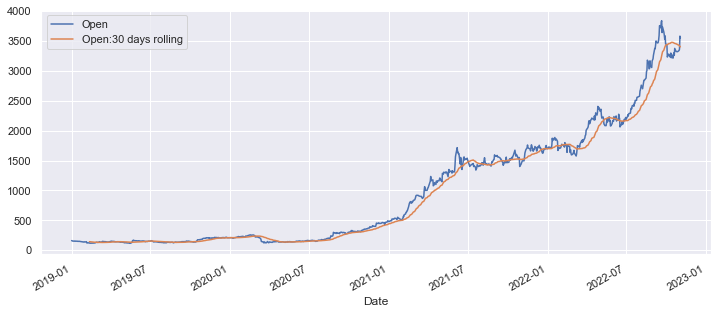

In [43]:
adanient[['Open','Open:30 days rolling']].plot(figsize=(12,5))

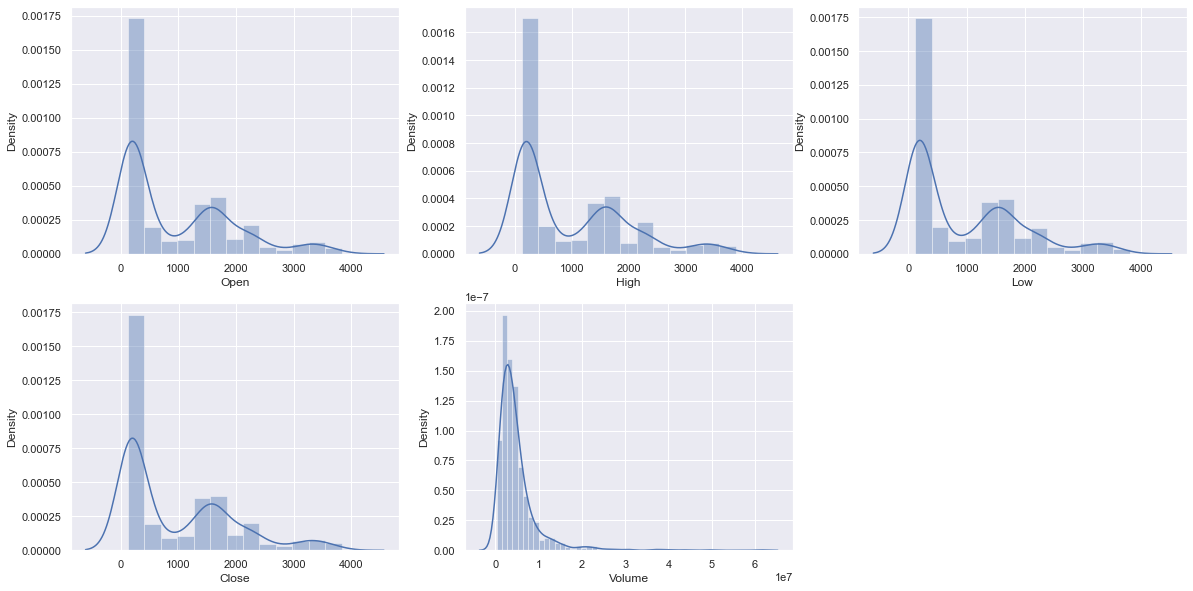

In [44]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(adanient[col])
plt.show()

- In the distribution plot of OHLC data, we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed.

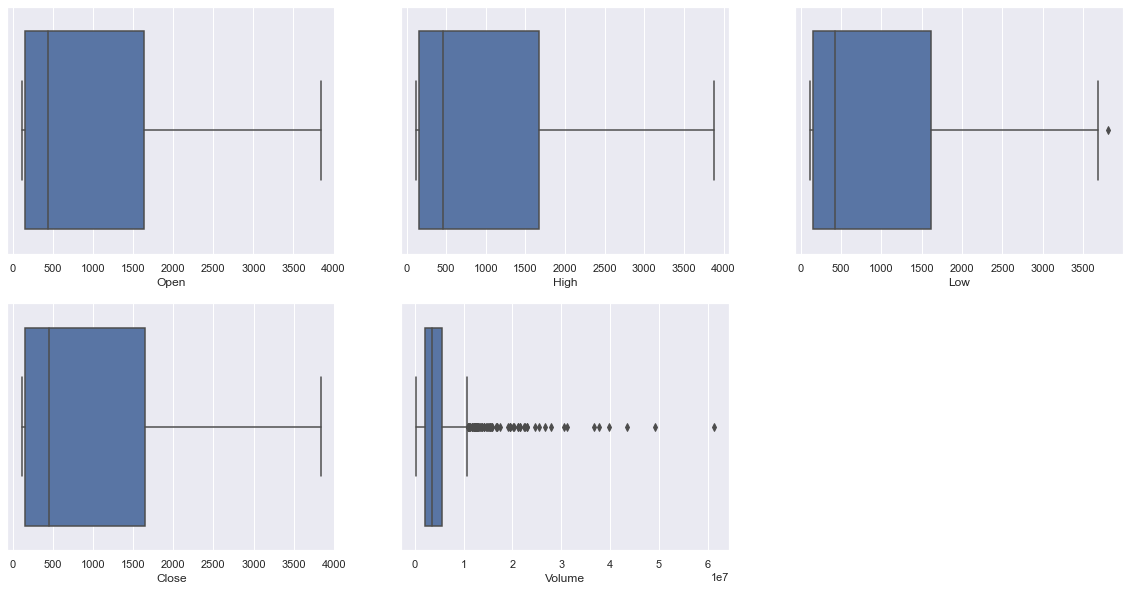

In [45]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(adanient[col])
plt.show()

- From the above boxplots, we can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier.

## Feature Engineering

In [46]:
adanient=adanient.reset_index()

In [47]:
adanient['year'] = adanient['Date'].dt.year
adanient['month'] = adanient['Date'].dt.month
adanient['day'] = adanient['Date'].dt.day
adanient.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open:30 days rolling,year,month,day
0,2019-01-01,160.899994,162.350006,155.449997,157.250000,155.465088,4726656,NaN,2019,1,1
1,2019-01-02,157.000000,157.850006,152.500000,154.850006,153.092361,2735262,NaN,2019,1,2
2,2019-01-03,154.899994,156.100006,150.300003,152.500000,150.769012,2758876,NaN,2019,1,3
3,2019-01-04,152.100006,154.000000,150.000000,152.550003,150.818451,2777308,NaN,2019,1,4
4,2019-01-07,152.899994,154.449997,150.250000,151.250000,149.533203,2714218,NaN,2019,1,7


In [48]:
# set index using column
adanient = adanient.set_index('Date')

In [49]:
adanient['is_quarter_end'] = np.where(adanient['month']%3==0,1,0)
adanient.head()

,Open,High,Low,Close,Adj Close,Volume,Open:30 days rolling,year,month,day,is_quarter_end
Date,,,,,,,,,,,
2019-01-01,160.899994,162.350006,155.449997,157.250000,155.465088,4726656,NaN,2019,1,1,0
2019-01-02,157.000000,157.850006,152.500000,154.850006,153.092361,2735262,NaN,2019,1,2,0
2019-01-03,154.899994,156.100006,150.300003,152.500000,150.769012,2758876,NaN,2019,1,3,0
2019-01-04,152.100006,154.000000,150.000000,152.550003,150.818451,2777308,NaN,2019,1,4,0
2019-01-07,152.899994,154.449997,150.250000,151.250000,149.533203,2714218,NaN,2019,1,7,0


In [50]:
adanientPivot = pd.pivot_table(adanient, values = "Close", columns = "year", index = "month")

In [51]:
adanientPivot.head()

year,2019,2020,2021,2022
month,,,,
1,147.121739,218.793480,517.032498,1776.404993
2,124.339474,242.610524,707.327505,1713.949988
3,140.208334,161.490476,933.876194,1771.292864
4,141.044736,139.463888,1155.536840,2217.150024
5,137.509090,138.813157,1293.480005,2156.814261


<AxesSubplot:xlabel='month'>

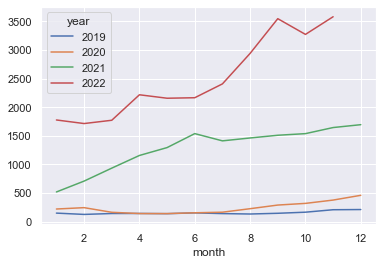

In [52]:
adanientPivot.plot()

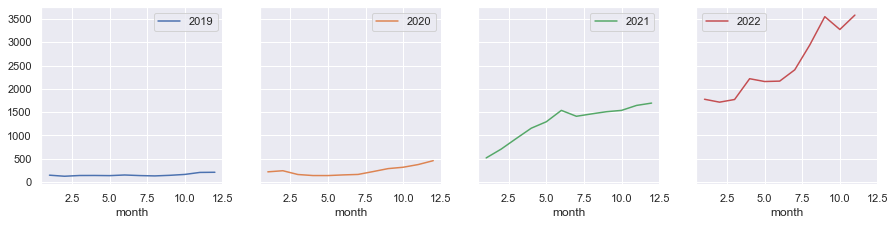

In [53]:
adanientPivot.plot(subplots = True, figsize=(15, 15), layout=(4,4), sharey=True)
plt.show()

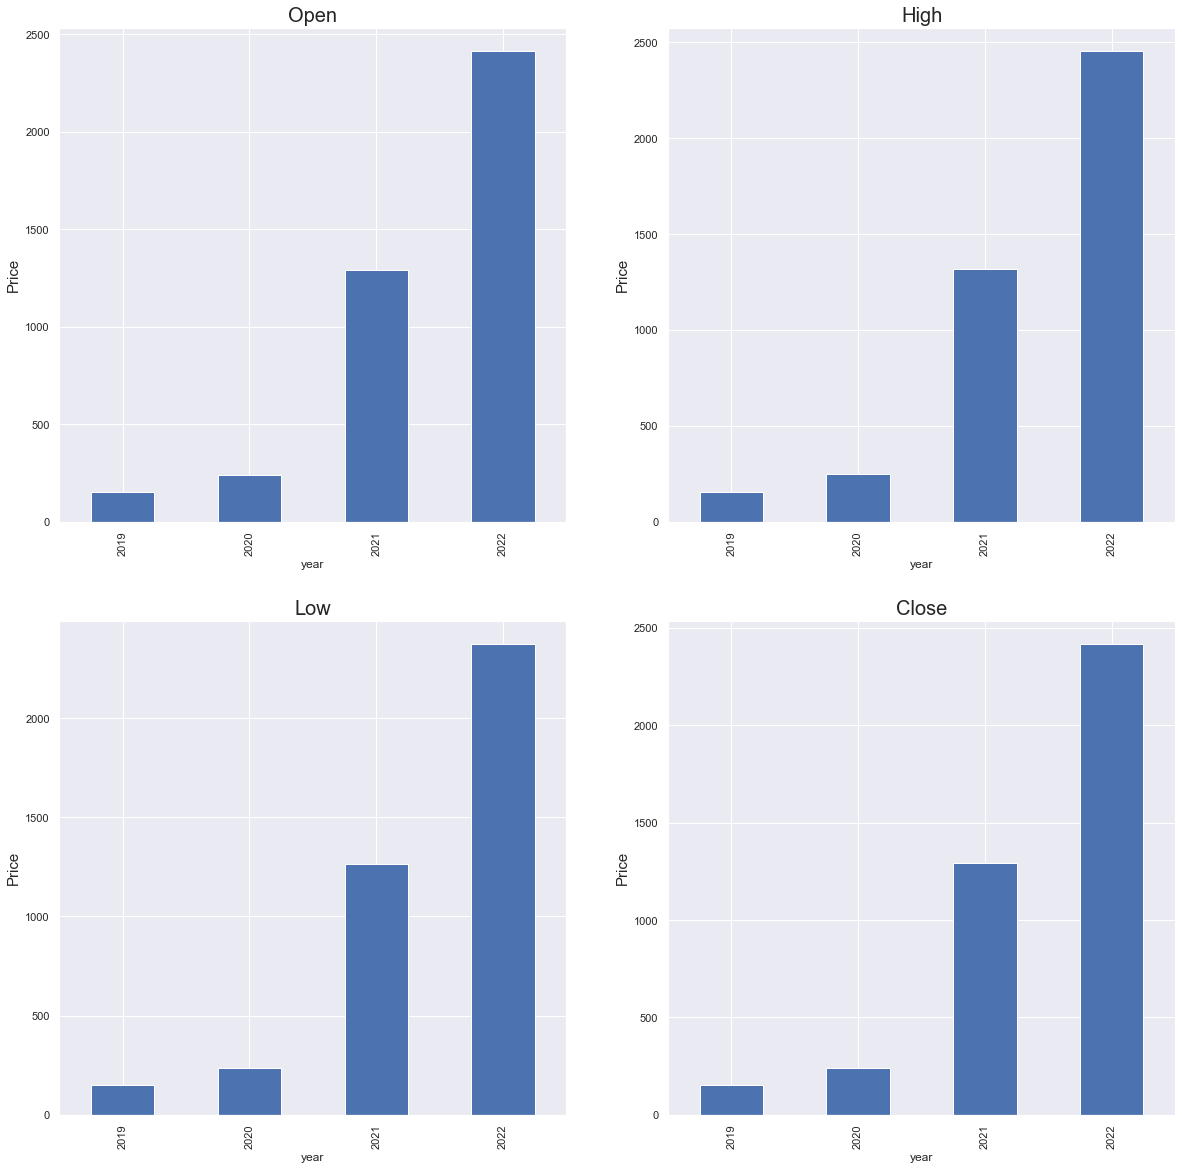

In [54]:
data_grouped = adanient.groupby('year').mean()
plt.subplots(figsize=(20,20))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  plt.ylabel('Price', fontsize=15)
  plt.title(col, fontsize=20)
  data_grouped[col].plot.bar()
plt.show()

- From the above bar graph, we can conclude that the stock prices have 15 times from the year 2019 to that in 2022.

In [55]:
adanient.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Adj Close,Volume,Open:30 days rolling,year,month,day
is_quarter_end,,,,,,,,,,
0,941.272633,959.315850,924.765064,943.065141,942.172049,4.778843e+06,935.303652,2020.443218,5.862776,15.733438
1,1020.531170,1040.248731,1000.349369,1021.284970,1020.372904,5.139329e+06,957.697521,2020.443038,7.281646,15.762658


Here are some of the important observations of the above-grouped data:

- Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
- The volume of trades is lower in the months which are quarter end.

In [56]:
adanient['open-close']  = adanient['Open'] - adanient['Close']
adanient['low-high']  = adanient['Low'] - adanient['High']
adanient['target'] = np.where(adanient['Close'].shift(-1) > adanient['Close'], 1, 0)

- Above we have added some more columns which will help in the training of our model. We have added the target feature which is a signal whether to buy or not we will train our model to predict this only. But before proceeding let’s check whether the target is balanced or not using a pie chart.

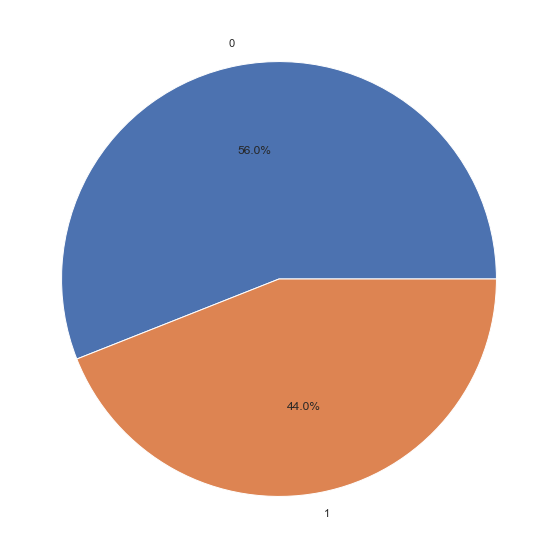

In [57]:
plt.figure(figsize=(10, 10))
plt.pie(adanient['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

- When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm.

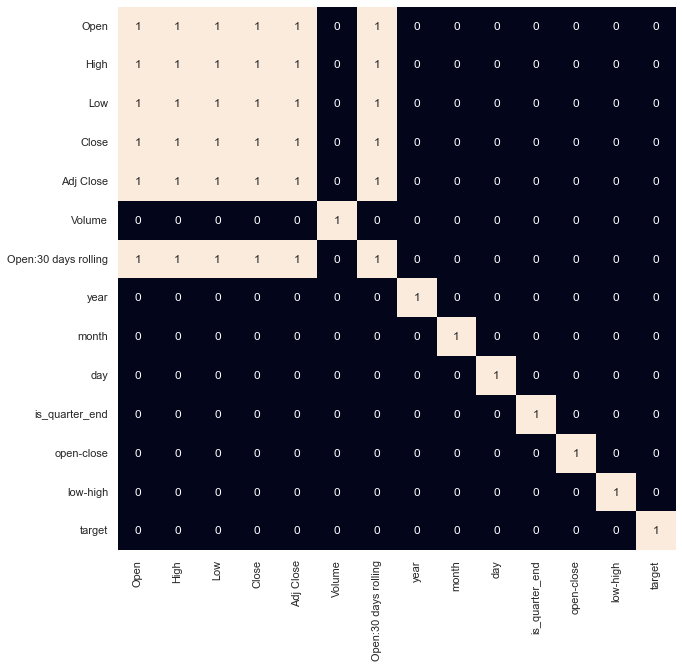

In [58]:
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(adanient.corr() > 0.9, annot=True, cbar=False)
plt.show()

- From the above heatmap, we can say that there is a high correlation between OHLC that is pretty obvious and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

## Data Splitting and Normalization

In [59]:
features = adanient[['open-close', 'low-high', 'is_quarter_end']]
target = adanient['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(855, 3) (95, 3)


- After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model. After that whole data has been split into two parts with a 90/10 ratio so, that we can evaluate the performance of our model on unseen data.

## Model Development and Evaluation

- Now is the time to train some state-of-the-art machine learning models(Logistic Regression, Support Vector Machine, XGBClassifier), and then based on their performance on the training and validation data we will choose which ML model is serving the purpose at hand better.

In [60]:

models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5689750692520776
Validation Accuracy :  0.4316712834718375

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5809085872576177
Validation Accuracy :  0.44182825484764543

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...) : 
Training Accuracy :  0.9893351800554017
Validation A

- Among the three models, we have trained XGBClassifier has the highest performance but it is pruned to overfitting as the difference between the training and the validation accuracy is too high. But in the case of the Logistic Regression, this is not the case.
- Now let’s plot a confusion matrix for the validation data.

<Figure size 1440x1440 with 0 Axes>

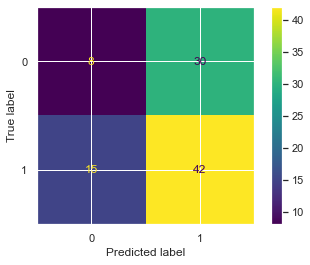

In [61]:
plt.figure(figsize=(20, 20))
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()

## Model Linear Regression model

In [62]:
adanient=adanient.reset_index()
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Adani Enterprises',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

adanient_data = [{'x':adanient['Date'], 'y':adanient['Close']}]
plot = go.Figure(data=adanient_data, layout=layout)

In [63]:
#plot(plot) #plotting offline
iplot(plot)

In [64]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [65]:

#Split the data into train and test sets
X = np.array(adanient.index).reshape(-1,1)
Y = adanient['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [66]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [67]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [68]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(x = X_train.T[0],y = Y_train,mode = 'markers',name = 'Actual')
trace1 = go.Scatter(x = X_train.T[0],y = lm.predict(X_train).T,mode = 'lines',name = 'Predicted')
adanient_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=adanient_data, layout=layout)

In [69]:
iplot(plot2)

In [70]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8217821409507651	0.8362676928379684
MSE       160795.17281890797	158270.4011447389



## Conclusion:
- We can observe that the accuracy achieved by the state-of-the-art ML model is no better than simply guessing with a probability of 50%. Possible reasons for this may be the lack of data or using a very simple model to perform such a complex task as Stock Market prediction.